In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
#1) Calculate How many properties in each neighbour hood group

Text(0.5, 1.0, 'Number of Properties by Neighborhood Group')

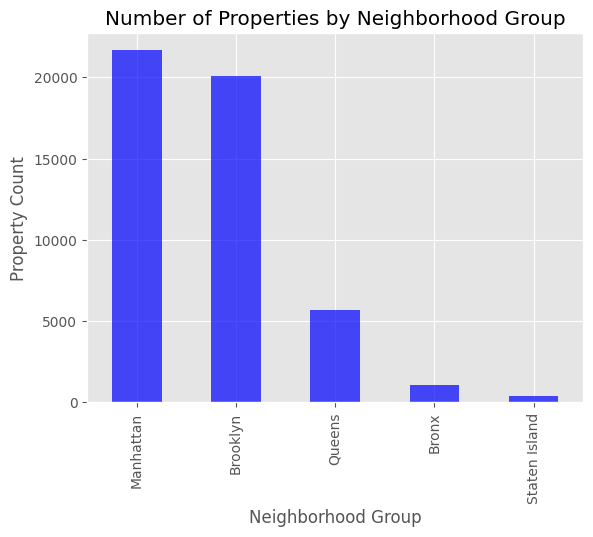

In [ ]:
neighbourhood_counts = df['neighbourhood_group'].value_counts()
neighbourhood_counts
import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the property counts as a bar chart
neighbourhood_counts.plot(kind='bar', color='blue', alpha=0.7)

# Set the labels and title of the bar chart
plt.xlabel('Neighborhood Group')
plt.ylabel('Property Count')
plt.title('Number of Properties by Neighborhood Group')

In [ ]:
highest_price_group = df.groupby('neighbourhood_group')['price'].mean().idxmax()
print(highest_price_group)


Manhattan


# ******

In [ ]:
#2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

In [ ]:
mean_prices = df.groupby('neighbourhood_group')['price'].mean()
highest_price_group = mean_prices.idxmax()
highest_price_group

'Manhattan'

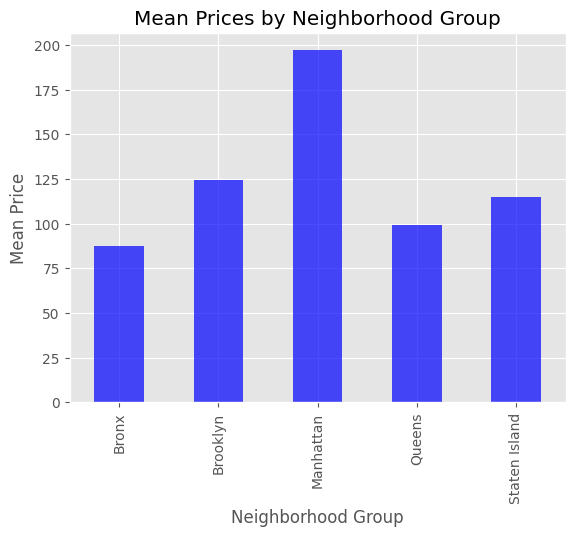

In [ ]:

import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the mean prices as a bar chart
mean_prices.plot(kind='bar', color='blue', alpha=0.7)
# Highlight the neighborhood group with the highest prices
#plt.axvline(x = 'highest_price_group' , color='red', linestyle='--', linewidth=2)
# Set the labels and title of the bar chart
plt.xlabel('Neighborhood Group')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Neighborhood Group')

# Display the bar chart
plt.show()

In [ ]:
#3) Which Neighboorhood group has lowest prices use bar chart to show this for all neighbourhood groups***

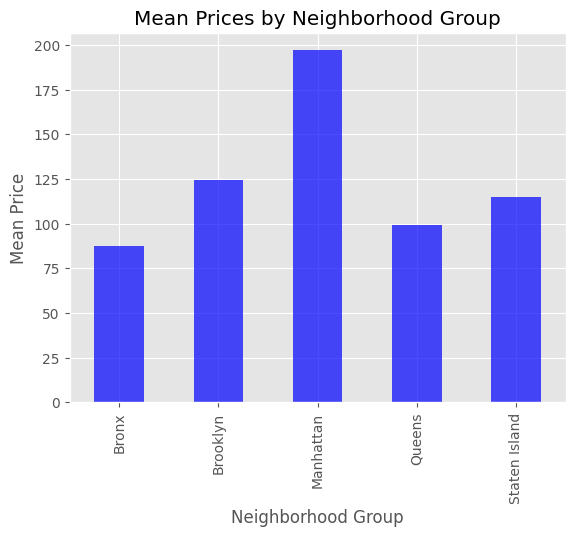

In [ ]:
mean_prices = df.groupby('neighbourhood_group')['price'].mean()
lowest_price_group = mean_prices.idxmin()
import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the mean prices as a bar chart
mean_prices.plot(kind='bar', color='blue', alpha=0.7)

# Highlight the neighborhood group with the lowest prices
#plt.axvline(x=lowest_price_group, color='red', linestyle='--', linewidth=2)

# Set the labels and title of the bar chart
plt.xlabel('Neighborhood Group')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Neighborhood Group')

# Display the bar chart
plt.show()

In [ ]:
# 4) Highest and lowest price airbnb in each Neighbour Hood Group

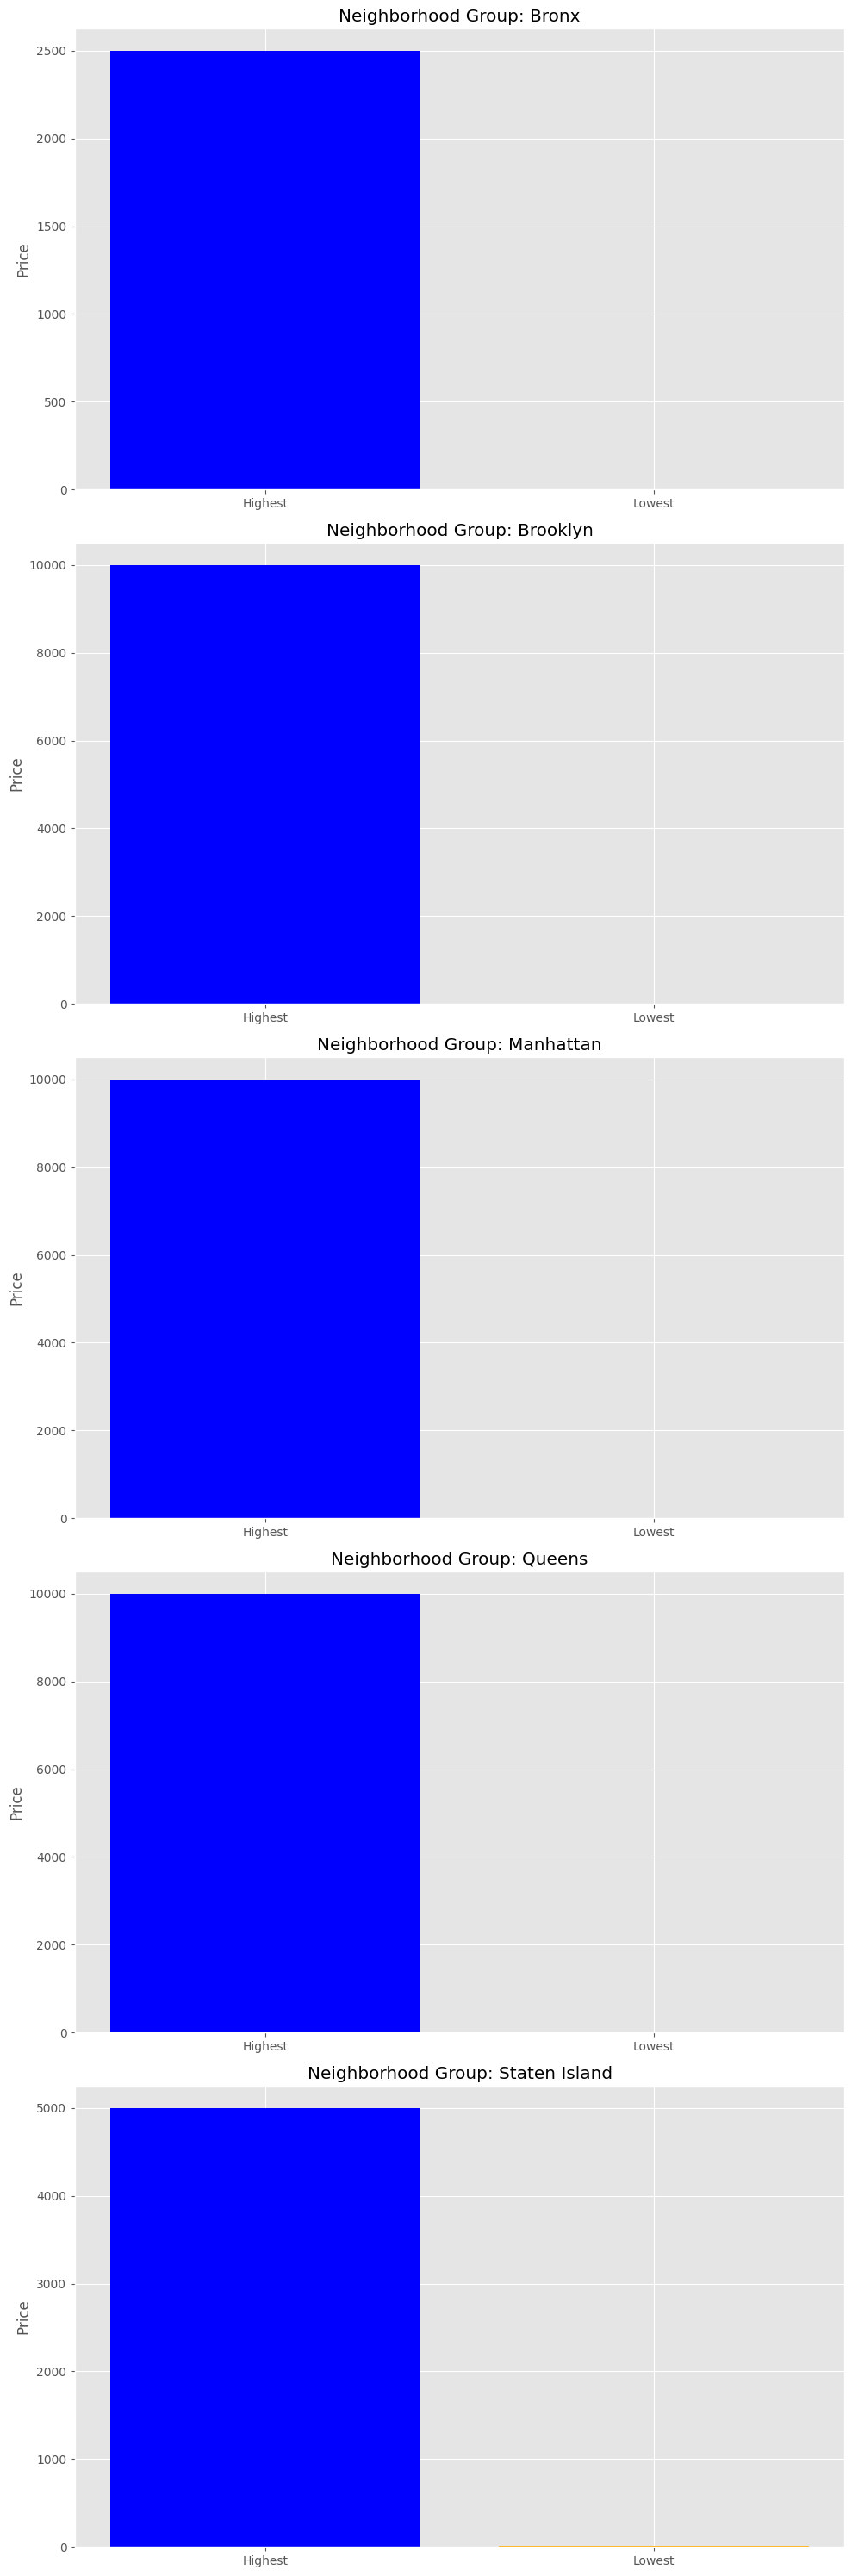

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by neighborhood group
grouped_df = df.groupby('neighbourhood_group')

# Create subplots for each neighborhood group
fig, axes = plt.subplots(len(grouped_df), 1, figsize=(10, 6 * len(grouped_df)))

# Iterate over each group and plot the highest and lowest priced listings
for i, (group_name, group_data) in enumerate(grouped_df):
    ax = axes[i]

    # Find the highest and lowest priced listings in the group
    highest_price = group_data.loc[group_data['price'].idxmax()]
    lowest_price = group_data.loc[group_data['price'].idxmin()]

    # Plot the highest priced listing
    ax.bar('Highest', highest_price['price'], color='blue')

    # Plot the lowest priced listing
    ax.bar('Lowest', lowest_price['price'], color='orange')

    # Set the title and y-axis label
    ax.set_title(f"Neighborhood Group: {group_name}")
    ax.set_ylabel('Price')

# Adjust the layout of subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
# 5) Which Host has Highest count of properties

In [ ]:
host_count = df['host_id'].value_counts()
print(host_count)
highest_count_host = host_count.idxmax()
highest_count_host_info = df[df['host_id'] == highest_count_host]['host_name'].iloc[0]
print(f"The host with the highest count of properties is {highest_count_host_info} (Host ID: {highest_count_host})")

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64
The host with the highest count of properties is Sonder (NYC) (Host ID: 219517861)


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64


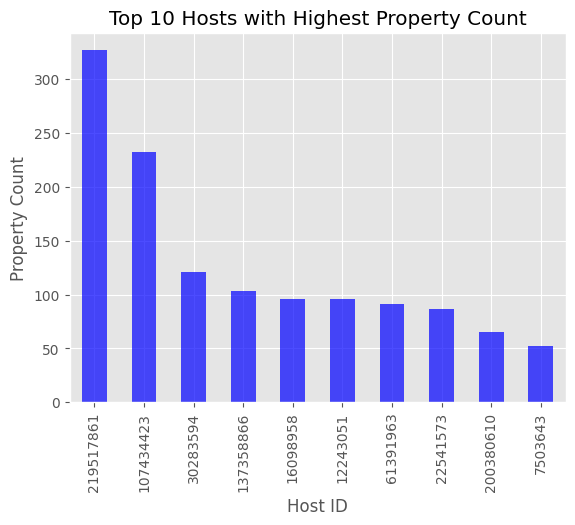

In [ ]:
host_count = df['host_id'].value_counts()
print(host_count)
top_10_hosts = host_count.head(10)

import matplotlib.pyplot as plt
# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the count of properties for the top 10 hosts as a bar chart
top_10_hosts.plot(kind='bar', color='blue', alpha=0.7)

# Set the labels and title of the bar chart
plt.xlabel('Host ID')
plt.ylabel('Property Count')
plt.title('Top 10 Hosts with Highest Property Count')

# Display the bar chart
plt.show()

In [ ]:
# 6) Which neighbourhood is most expensive and cheapest

In [ ]:
avg_prices = df.groupby('neighbourhood')['price'].mean()
most_expensive_neighborhood = avg_prices.idxmax()
cheapest_neighborhood = avg_prices.idxmin()
print(f"The most expensive neighborhood is {most_expensive_neighborhood}")
print(f"The cheapest neighborhood is {cheapest_neighborhood}")

The most expensive neighborhood is Fort Wadsworth
The cheapest neighborhood is Bull's Head


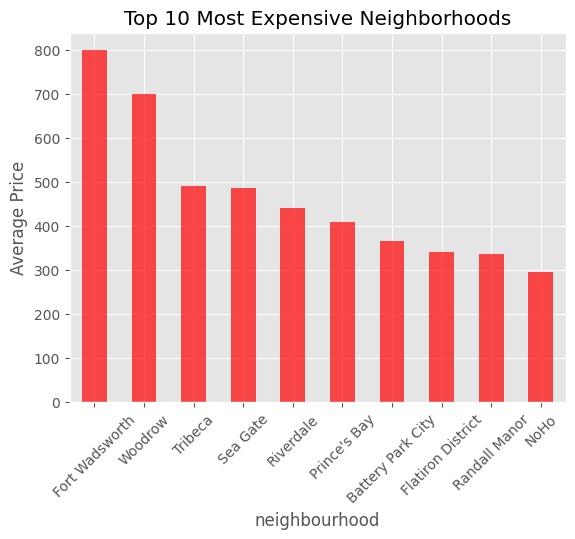

In [ ]:
avg_prices = df.groupby('neighbourhood')['price'].mean()
sorted_prices_asc = avg_prices.sort_values(ascending=True)
sorted_prices_desc = avg_prices.sort_values(ascending=False)
top_10_expensive_neighborhoods = sorted_prices_desc.head(10)
top_10_cheapest_neighborhoods = sorted_prices_asc.head(10)
import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the count of properties for the top 10 hosts as a bar chart
top_10_expensive_neighborhoods.plot(kind='bar', color='red', alpha=0.7)

# Set the labels and title of the bar chart
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

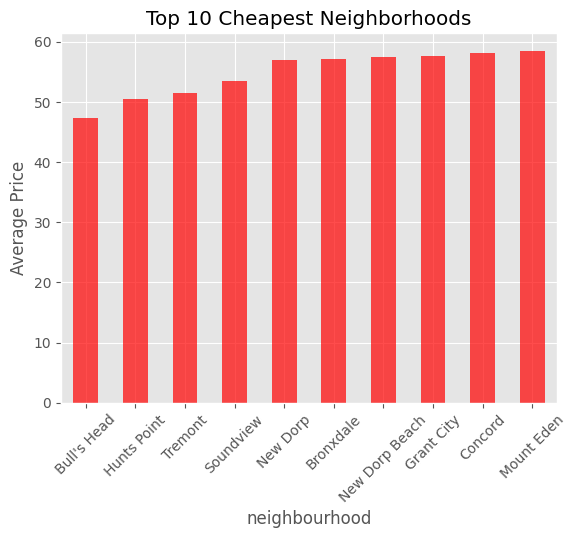

In [ ]:
import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Plot the count of properties for the top 10 hosts as a bar chart
top_10_cheapest_neighborhoods.plot(kind='bar', color='red', alpha=0.7)

# Set the labels and title of the bar chart
plt.ylabel('Average Price')
plt.title('Top 10 Cheapest Neighborhoods')
plt.xticks(rotation=45)
# Display the bar chart
plt.show()

In [ ]:
#7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset

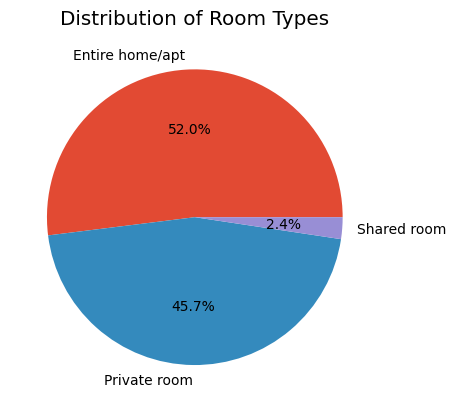

In [ ]:
room_counts = df['room_type'].value_counts()
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')

plt.show()

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# 8) scatter plot between longitutude and latitude for different neighbourhood groups

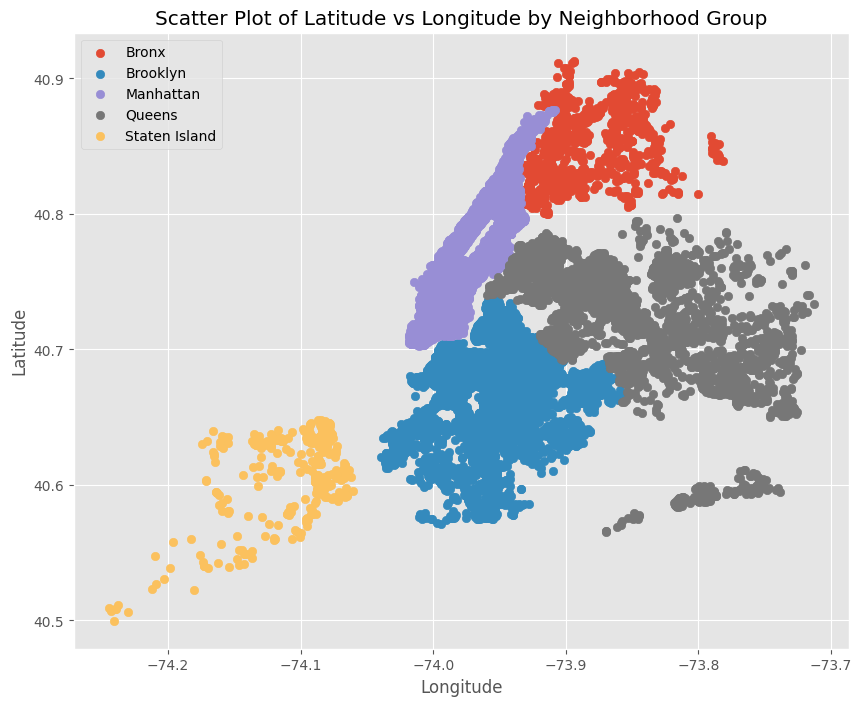

In [ ]:
grouped_df = df.groupby('neighbourhood_group')

import matplotlib.pyplot as plt

# Set the style of the scatter plot
plt.style.use('ggplot')

# Create a figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over each group and plot the scatter plot
for group_name, group_data in grouped_df:
    ax.scatter(group_data['longitude'], group_data['latitude'], label=group_name)

# Set the labels and title of the scatter plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Scatter Plot of Latitude vs Longitude by Neighborhood Group')

# Add a legend to differentiate the neighborhood groups
ax.legend()

# Display the scatter plot
plt.show()

In [ ]:
# 9) scatter plot between longitutude and latitude for different room_types

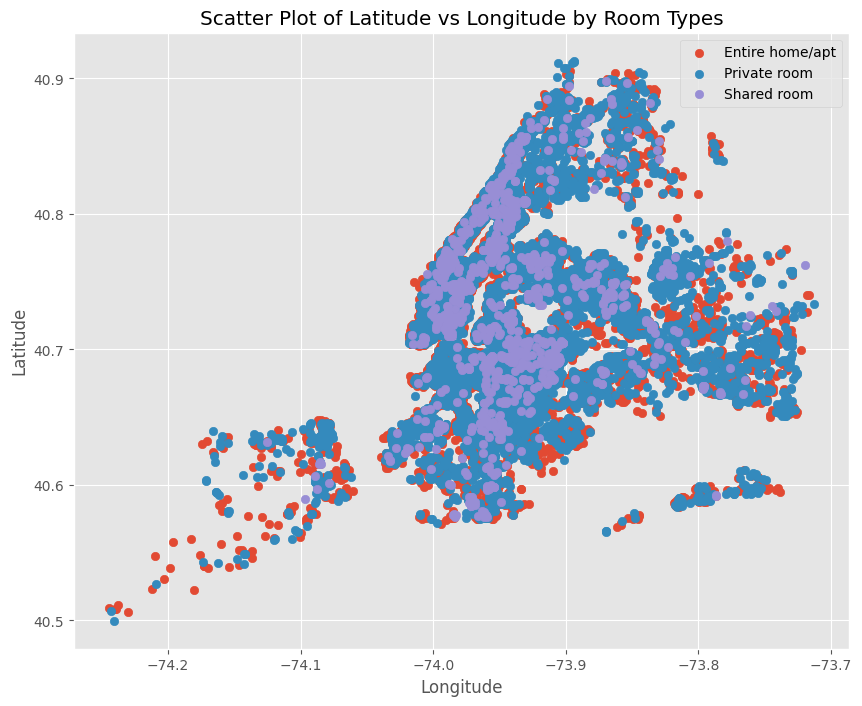

In [ ]:
grouped_df = df.groupby('room_type')

import matplotlib.pyplot as plt

# Set the style of the scatter plot
plt.style.use('ggplot')

# Create a figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate over each group and plot the scatter plot
for group_name, group_data in grouped_df:
    ax.scatter(group_data['longitude'], group_data['latitude'], label=group_name)

# Set the labels and title of the scatter plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Scatter Plot of Latitude vs Longitude by Room Types')

# Add a legend to differentiate the neighborhood groups
ax.legend()

# Display the scatter plot
plt.show()

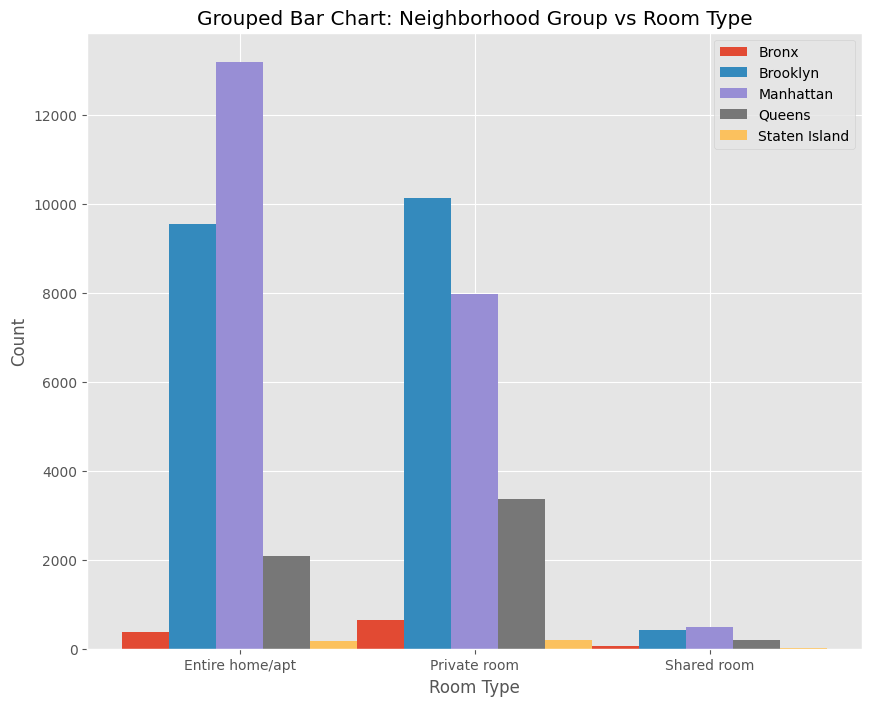

In [ ]:
grouped_df = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()

import matplotlib.pyplot as plt

# Set the style of the bar chart
plt.style.use('ggplot')

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Get the number of neighborhood groups and room types
num_groups = grouped_df.shape[0]
num_room_types = grouped_df.shape[1]

# Set the width and spacing for the bars
bar_width = 0.2
spacing = 0
group_gap = 0.5

# Iterate over the neighborhood groups and plot the grouped bar chart
for i, (group_name, group_data) in enumerate(grouped_df.iterrows()):
    x = [j + (bar_width + spacing) * i for j in range(num_room_types)]
    ax.bar(x, group_data, width=bar_width, label=group_name)

# Set the x-axis labels and tick positions
x_tick_positions = [j + (bar_width + spacing) * (num_groups - 1) / 2 for j in range(num_room_types)]
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(grouped_df.columns)

# Set the labels and title of the bar chart
ax.set_xlabel('Room Type')
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart: Neighborhood Group vs Room Type')

# Add a legend to differentiate the neighborhood groups
ax.legend()
group_gap = 0.5
# Display the bar chart
plt.show()

In [ ]:
# 11)  room_type vs price bar chart for the mean and highest and lowest***

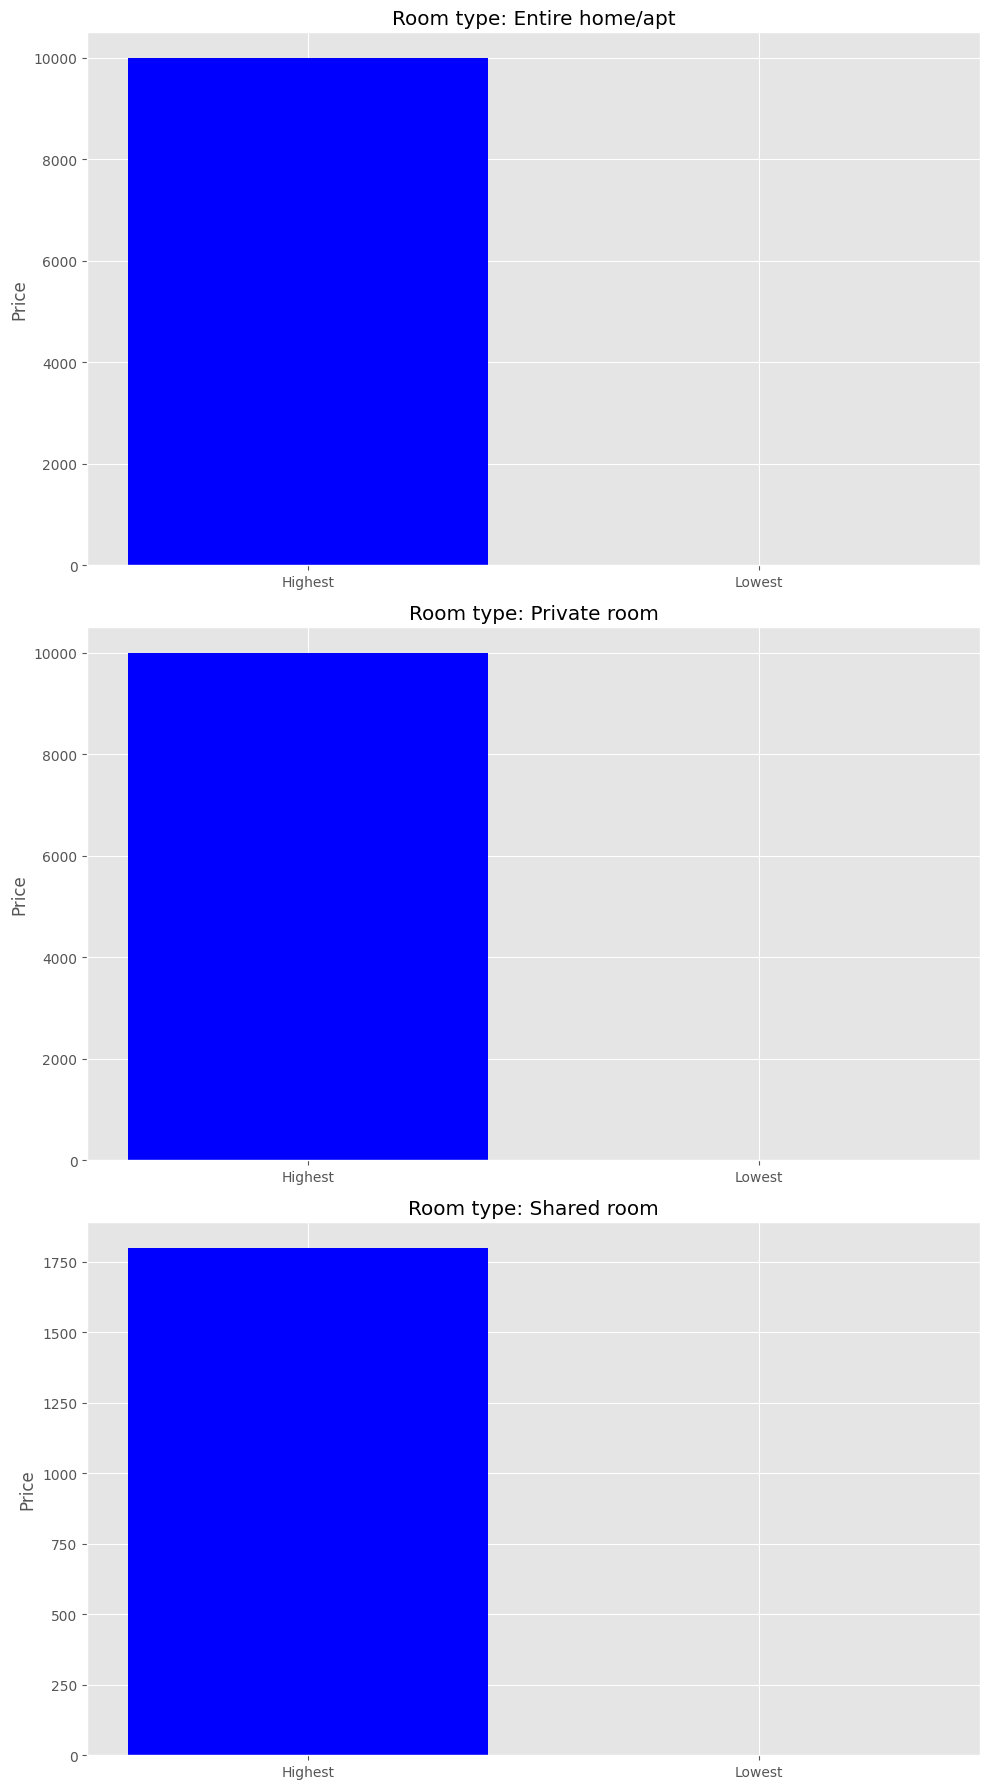

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by room types
grouped_df = df.groupby('room_type')

# Create subplots for each room types
fig, axes = plt.subplots(len(grouped_df), 1, figsize=(10, 6 * len(grouped_df)))

# Iterate over each group and plot the highest and lowest priced listings
for i, (group_name, group_data) in enumerate(grouped_df):
    ax = axes[i]

    # Find the highest and lowest priced listings in the group
    highest_price = group_data.loc[group_data['price'].idxmax()]
    lowest_price = group_data.loc[group_data['price'].idxmin()]


    # Plot the highest priced listing
    ax.bar('Highest', highest_price['price'], color='blue')

    # Plot the lowest priced listing
    ax.bar('Lowest', lowest_price['price'], color='orange')

    # Set the title and y-axis label
    ax.set_title(f"Room type: {group_name}")
    ax.set_ylabel('Price')

# Adjust the layout of subplots
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
#finding the percentage of missing values
column_names=list(df.columns)
df_missing_value_percentage = df.isnull().sum()
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

id 0
name 16
host_id 0
host_name 21
neighbourhood_group 0
neighbourhood 0
latitude 0
longitude 0
room_type 0
price 0
minimum_nights 0
number_of_reviews 0
last_review 10052
reviews_per_month 10052
calculated_host_listings_count 0
availability_365 0


In [ ]:
df=df.drop(['name'],axis=1)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:

df.dropna(subset=['host_name'], inplace=True)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373041,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,1.373041,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,1.373041,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1.373041,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,1.373041,6,2


In [ ]:
df=df.drop(['last_review'],axis=1)
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373041,1,365
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373041,2,9
48891,36485057,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373041,2,36
48892,36485431,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373041,1,27
48893,36485609,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373041,6,2


In [ ]:
#find the categorical columns
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column has a data type of 'object' (common for categorical data)
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 4
Categorical columns: ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,4989,1,108,40.64749,-73.97237,1,149,1,9,0.210000,6,365
1,2595,2845,4785,2,127,40.75362,-73.98377,0,225,1,45,0.380000,2,355
2,3647,4632,2909,2,94,40.80902,-73.94190,1,150,3,0,1.373041,1,365
3,3831,4869,6203,1,41,40.68514,-73.95976,0,89,1,270,4.640000,1,194
4,5022,7192,5923,2,61,40.79851,-73.94399,0,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,9051,1,13,40.67853,-73.94995,1,70,2,0,1.373041,2,9
48891,36485057,6570630,6776,1,28,40.70184,-73.93317,1,40,4,0,1.373041,2,36
48892,36485431,23492952,4263,2,94,40.81475,-73.94867,0,115,10,0,1.373041,1,27
48893,36485609,30985759,10190,2,95,40.75751,-73.99112,2,55,1,0,1.373041,6,2


In [ ]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column has a data type of 'object' (common for categorical data)
        categorical_columns.append(column)
num_categorical_columns = len(categorical_columns)

print("Number of categorical columns:", num_categorical_columns)
print("Categorical columns:", categorical_columns)

Number of categorical columns: 0
Categorical columns: []


In [ ]:
y = df['price'] #dependent
X= df.drop(['price'], axis=1)#independent


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print('accuracy_random_Forest : %.3f' %accuracy)

accuracy_random_Forest : 0.085


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'n_neighbors' is the desired number of neighbors for the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy_KNN : %.3f' %accuracy)

Accuracy_KNN : 0.044


In [ ]:
from keras.models import Sequential
import tensorflow as tf
tf.__version__
from keras.layers import Dense
from sklearn.metrics import accuracy_score

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs=3, batch_size=32)
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy_ANN : %.3f' %accuracy)

Epoch 1/3
1222/1222 [==============================] - 3s 2ms/step - loss: -250761019392.0000 - accuracy: 0.0000e+00
Epoch 2/3
1222/1222 [==============================] - 2s 1ms/step - loss: -4344630738944.0000 - accuracy: 0.0000e+00
Epoch 3/3
306/306 [==============================] - 0s 840us/step
Accuracy_ANN : 0.000


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.04276214833759591


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
